#  지연 속성 #

*Flu Trends* dataset은 2009년부터 2016년 사이에 주차별(weekly) 독감때문에 병원에 방문한 환자의 수에 대한 데이터입니다. *Flu Trends* dataset을 사용하여 지연 속성에 따른 환자수 예측 모델을 생성해 봅니다.

## 1. 데이터 불러오기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf
import util

flu_trends = pd.read_csv("./dataset/flu-trends.csv")
flu_trends.head()

,Week,AInfluenza,AcuteBronchitis,BodyTemperature,BraunThermoscan,BreakAFever,Bronchitis,ChestCold,ColdAndFlu,ColdOrFlu,...,TreatingTheFlu,TreatmentForFlu,TreatmentForTheFlu,Tussin,Tussionex,TypeAInfluenza,UpperRespiratory,WalkingPneumonia,WhatToDoIfYouHaveTheFlu,FluVisits
0,2009-06-29/2009-07-05,36,20,43,27,11,22,16,7,3,...,16,6,13,25,34,30,25,24,15,180
1,2009-07-06/2009-07-12,25,19,40,31,10,21,11,6,8,...,16,7,8,27,32,27,28,29,9,115
2,2009-07-13/2009-07-19,24,30,45,20,12,20,20,6,6,...,16,6,9,24,28,25,25,25,9,132
3,2009-07-20/2009-07-26,23,19,40,15,10,19,12,7,10,...,8,5,12,21,26,26,29,24,13,109
4,2009-07-27/2009-08-02,27,21,44,20,11,19,17,8,10,...,8,8,12,33,29,21,27,30,9,120


In [2]:
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)
flu_trends.head()

,AInfluenza,AcuteBronchitis,BodyTemperature,BraunThermoscan,BreakAFever,Bronchitis,ChestCold,ColdAndFlu,ColdOrFlu,ColdVersusFlu,...,TreatingTheFlu,TreatmentForFlu,TreatmentForTheFlu,Tussin,Tussionex,TypeAInfluenza,UpperRespiratory,WalkingPneumonia,WhatToDoIfYouHaveTheFlu,FluVisits
Week,,,,,,,,,,,,,,,,,,,,,
2009-06-29/2009-07-05,36,20,43,27,11,22,16,7,3,8,...,16,6,13,25,34,30,25,24,15,180
2009-07-06/2009-07-12,25,19,40,31,10,21,11,6,8,8,...,16,7,8,27,32,27,28,29,9,115
2009-07-13/2009-07-19,24,30,45,20,12,20,20,6,6,8,...,16,6,9,24,28,25,25,25,9,132
2009-07-20/2009-07-26,23,19,40,15,10,19,12,7,10,15,...,8,5,12,21,26,26,29,24,13,109
2009-07-27/2009-08-02,27,21,44,20,11,19,17,8,10,15,...,8,8,12,33,29,21,27,30,9,120


[Text(0, 0.5, 'Office Visits')]

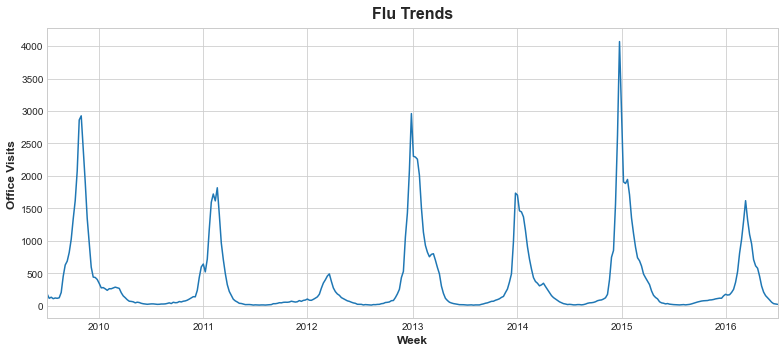

In [3]:
util.init_plt()
ax = flu_trends['FluVisits'].plot(title='Flu Trends')
ax.set(ylabel="Office Visits")

## 2. 지연 속성 확인하기

`FluVisits`는 규칙적인 계절성을 갖지 않고, 규칙적이지 않은 주기(cycle)를 보이고 있습니다. 지연 속성에 따른 상관정도를 확인해보겠습니다.

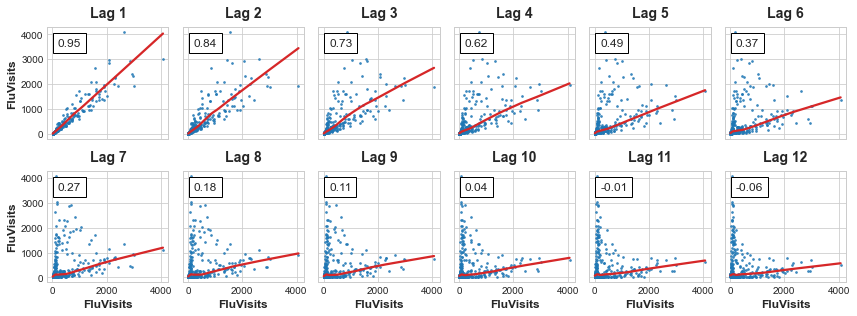

In [4]:
_= util.plot_lags(flu_trends['FluVisits'], lags=12, nrows=2)

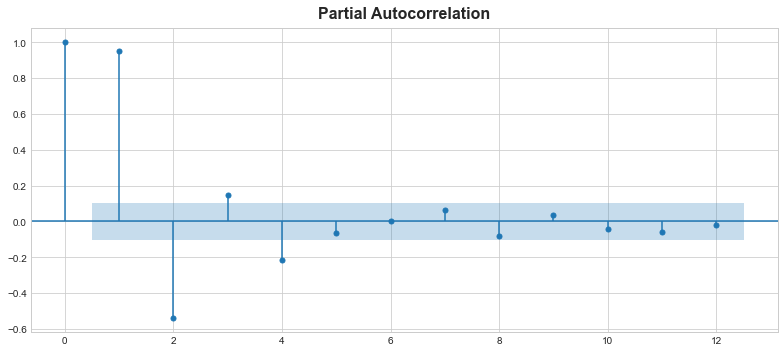

In [5]:
_ = plot_pacf(flu_trends['FluVisits'], lags=12)

## 3. 데이터 전처리

4만큼 지연 속성 생성

In [6]:
X = util.make_lags(flu_trends['FluVisits'], lags=4)
X = X.fillna(0.0)

In [7]:
y = flu_trends['FluVisits'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

## 4. 학습

In [8]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

## 5. 예측

In [9]:
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

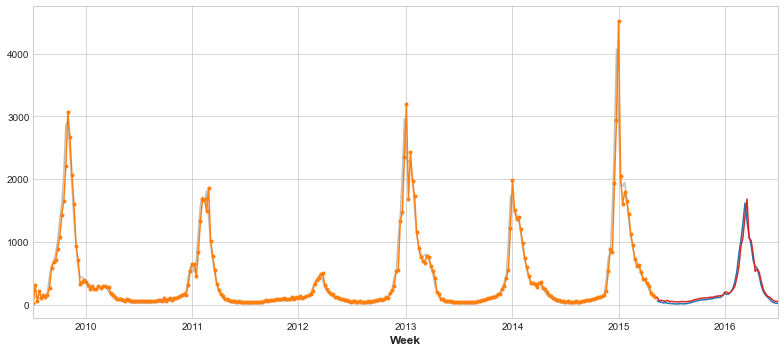

In [10]:
ax = y_train.plot(color="0.75", legend=False)
ax = y_test.plot()
ax = y_pred.plot(ax=ax, style=".-")
_ = y_fore.plot(ax=ax, color='C3')

<AxesSubplot:xlabel='Week'>

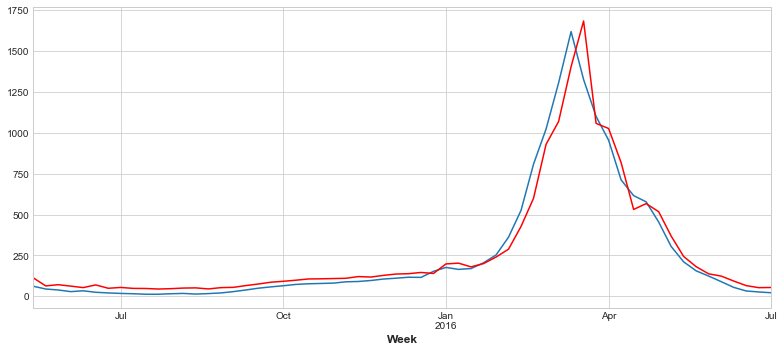

In [11]:
y_test.plot()
y_fore.plot(color='r')

# 더 많은 지연 속성

## 2. 데이터 전처리

In [12]:
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu", "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]
X0 = util.make_lags(flu_trends[search_terms], lags=3)
X1 = util.make_lags(flu_trends['FluVisits'], lags=4)
X = pd.concat([X0, X1], axis=1).fillna(0.0)
X.head()

,"(y_lag_1, FluContagious)","(y_lag_1, FluCough)","(y_lag_1, FluFever)","(y_lag_1, InfluenzaA)","(y_lag_1, TreatFlu)","(y_lag_1, IHaveTheFlu)","(y_lag_1, OverTheCounterFlu)","(y_lag_1, HowLongFlu)","(y_lag_2, FluContagious)","(y_lag_2, FluCough)",...,"(y_lag_3, FluFever)","(y_lag_3, InfluenzaA)","(y_lag_3, TreatFlu)","(y_lag_3, IHaveTheFlu)","(y_lag_3, OverTheCounterFlu)","(y_lag_3, HowLongFlu)",y_lag_1,y_lag_2,y_lag_3,y_lag_4
Week,,,,,,,,,,,,,,,,,,,,,
2009-06-29/2009-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-07-06/2009-07-12,5.0,16.0,15.0,36.0,6.0,5.0,11.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0
2009-07-13/2009-07-19,6.0,14.0,15.0,25.0,12.0,7.0,7.0,7.0,5.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,115.0,180.0,0.0,0.0
2009-07-20/2009-07-26,6.0,13.0,13.0,24.0,8.0,8.0,7.0,7.0,6.0,14.0,...,15.0,36.0,6.0,5.0,11.0,6.0,132.0,115.0,180.0,0.0
2009-07-27/2009-08-02,5.0,13.0,12.0,23.0,5.0,4.0,6.0,6.0,6.0,13.0,...,15.0,25.0,12.0,7.0,7.0,7.0,109.0,132.0,115.0,180.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

## 3. 학습

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 4. 예측

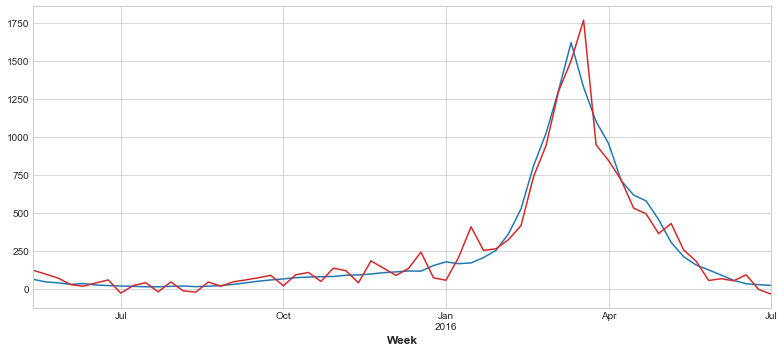

In [15]:
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

ax = y_test.plot()
_ = y_fore.plot(ax=ax, color='C3')